## Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.

### Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

    - Aggregate these login counts based on 15­minute time intervals
    - visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
    
Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import json

df = pd.read_json("/Users/kim.jiy/documents/springboard/ch20/ultimate_challenge/logins.json")

In [2]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
# First index on the timestamp column,
df.set_index('login_time',inplace = True)

# Add a numeric column (you need something for resampling to aggregate)
df['count'] = 1

df_15min= df.resample('15T', how='count')


/Users/kim.jiy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  import sys


In [5]:
df_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


The data is from 1920-01-01 to 1970-04-13 

There are not specific patterns a graph on 15 minutes interval. 

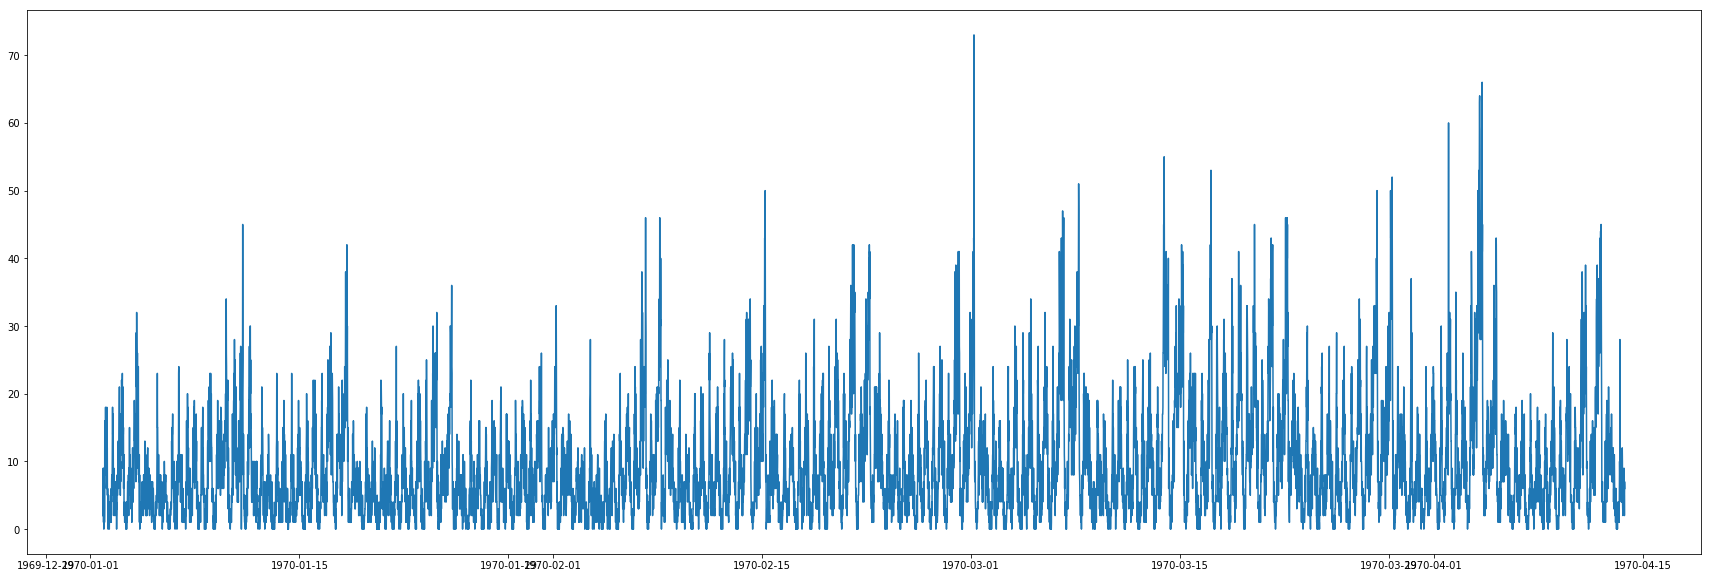

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))

plt.plot(df_15min)

In [7]:
df['time'] = pd.to_datetime(df.index)
df["month"]= df.time.dt.month
df["week"]= df.time.dt.dayofweek
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour


In [8]:
df.head()

,count,time,month,week,day,hour
login_time,,,,,,
1970-01-01 20:13:18,1,1970-01-01 20:13:18,1,3,1,20
1970-01-01 20:16:10,1,1970-01-01 20:16:10,1,3,1,20
1970-01-01 20:16:37,1,1970-01-01 20:16:37,1,3,1,20
1970-01-01 20:16:36,1,1970-01-01 20:16:36,1,3,1,20
1970-01-01 20:26:21,1,1970-01-01 20:26:21,1,3,1,20


### Login at each month

Login has increased from January to  March. We do not have full data for April. Eventhough, there is the lowest activities of login on April, we can not compare April with other month. 

Text(0.5, 1.0, 'Login for each month ')

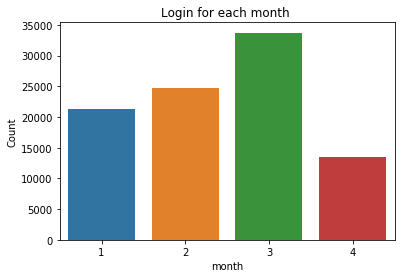

In [9]:
df_month = df[['count', 'month']]
df_month = df_month.groupby('month').sum().reset_index()

sns.barplot(x='month', y='count', data=df_month)
plt.ylabel('Count')
plt.xlabel('month')
plt.title('Login for each month ')

### Login at each week

Login has increased from Monday to Saturday. Saturday has the highest login activities. Login activities has little decreased on Sunday. 

Text(0.5, 1.0, 'Login for each week ')

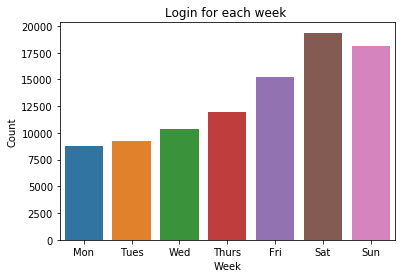

In [10]:

df_week = df[['count', 'week']]
df_week = df_week.groupby('week').sum().reset_index()
df_week["week"]=['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']

sns.barplot(x='week', y='count', data=df_week)
plt.ylabel('Count')
plt.xlabel('Week')
plt.title('Login for each week ')

### Login at each hour

Login activities have increased during lunch. We have the highest login activity at night. 


Text(0.5, 1.0, 'Login for each hour ')

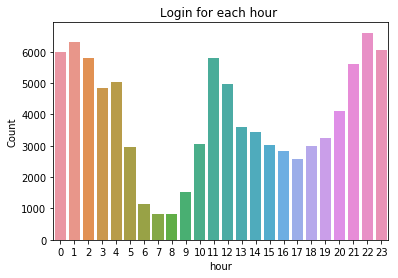

In [11]:
df_hour = df[['count', 'hour']]
df_hour = df_hour.groupby('hour').sum().reset_index()

sns.barplot(x='hour', y='count', data=df_hour)
plt.ylabel('Count')
plt.xlabel('hour')
plt.title('Login for each hour ')



### Conclusion for Part 1. 

1. Login activities have increased from January to March.
2. There are more login activities toward weekend.
3. Logins are active at the afternoon and at night. 

## Part 2

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

The goal of the company is to increase profits by encouraging driver partners to be available in both cities by reimbursing all toll costs. So the key mearsure of sucess would be profits after reimbursment of all toll costs. 

I would conduct A/B testing. I would divide to two groups of drivers and open service to one group so that drivers in the group can travel between two cities. The remaining group would have the service like before. After weeks of experiment, draw graphs to compare results from each two groups. T-test can be conducted on the means of profits from each two groups to check it is statistically significant.  

If the means of each profit are different, I would suggest to the city operations tea to open the service to public. 

### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).


In [12]:
file = open('/Users/kim.jiy/documents/springboard/ch20/ultimate_challenge/ultimate_data_challenge.json', 'r')
df_ultimate = pd.DataFrame(json.load(file))
file.close()



In [13]:
df_ultimate.info

<bound method DataFrame.info of        avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          3.67                   5.0                   4.7       1.10   
1          8.26                   5.0                   5.0       1.00   
2          0.77                   5.0                   4.3       1.00   
3          2.36                   4.9                   4.6       1.14   
4          3.13                   4.9                   4.4       1.19   
5         10.56                   5.0                   3.5       1.00   
6          3.95                   4.0                   NaN       1.00   
7          2.04                   5.0                   5.0       1.00   
8          4.36                   5.0                   4.5       1.00   
9          2.37                   5.0                   NaN       1.00   
10         4.28                   4.9                   5.0       1.00   
11         3.81                   5.0                   4.0       1.00   
12    

### Data Cleaning

Let's check whether it has missing values. By the table below, 3 columns,"avg_rating_of_driver","phone","avg_rating_by_driver",    have missing values. 

In [14]:
df_missing = df_ultimate.isnull().sum(axis=0).reset_index()

In [15]:
df_missing = df_ultimate.isnull().sum(axis=0).reset_index()
df_missing.columns = ["col_name",'missing_values']

df_missing.sort_values(by='missing_values', ascending=False )

,col_name,missing_values
2,avg_rating_of_driver,8122
6,phone,396
1,avg_rating_by_driver,201
0,avg_dist,0
3,avg_surge,0
4,city,0
5,last_trip_date,0
7,signup_date,0
8,surge_pct,0
9,trips_in_first_30_days,0


The columnm, "phone", has two values, "iphone" and "Android". The most frequent value is "iPhone". so fill missing values with "iPhone"

In [16]:
df_ultimate.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [17]:
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].mean(), inplace=True)
df_ultimate['phone'].fillna('iPhone', inplace=True)
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].mean(), inplace=True)


In [18]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data Visualization and EDA


As we are interested in predicting rider retention. "trips_in_first_30_days" is one of the important variables. From the bar plot below, most of users, 15390, which is 30.78%, didn't take any trip in 30 days. 43.02% of users took 1 or 2 trip in the first 30 days. 

/Users/kim.jiy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Count vs trips_in_first_30_days')

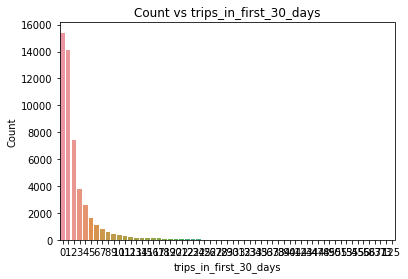

In [19]:
df_30days = df_ultimate[['trips_in_first_30_days']]
df_30days["count"] = 1

df_30days = df_30days.groupby('trips_in_first_30_days').sum().reset_index()

sns.barplot(x='trips_in_first_30_days', y='count', data=df_30days)
plt.ylabel('Count')
plt.xlabel('trips_in_first_30_days')
plt.title('Count vs trips_in_first_30_days')


In [20]:
# percentage of users who didn't take any trip in the first 30 days

trip_0 = len(df_ultimate[(df_ultimate["trips_in_first_30_days"]==0)])/ len(df_ultimate.trips_in_first_30_days)

print(trip_0*100)

30.78


In [21]:
# percentage of users who took 1 or 2 trip in the first 30 days

trip_1_2 = len(df_ultimate[(df_ultimate["trips_in_first_30_days"]>0) & (df_ultimate["trips_in_first_30_days"]<3)])/ len(df_ultimate.trips_in_first_30_days)

print(trip_1_2*100)

43.02


"weekday_pct" is the percent of the user’s trips occurring during a weekday. The mean of "weekday_pct" is 60.926% that means most trips occure during a weekday. 

In [22]:
df_ultimate.weekday_pct.describe()

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

From the bar plot below, we can find that most trip, 49.8% , took place on Winterfall 

In [23]:
# frequency table of city and trips in the first 30 days. 
df_30days_city = df_ultimate[['trips_in_first_30_days', 'city']]
df_30days_city = df_30days_city.groupby('city').sum().reset_index()
df_30days_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


In [24]:
#percentage of trip which took place on Winterfell

df_30days_city[df_30days_city.city=="Winterfell"].trips_in_first_30_days/df_30days_city.trips_in_first_30_days.sum()

2    0.49806
Name: trips_in_first_30_days, dtype: float64

Text(0.5, 1.0, 'City vs trips_in_first_30_days')

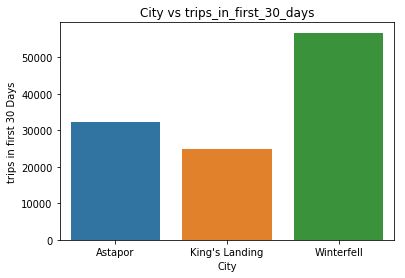

In [25]:
sns.barplot(x='city', y='trips_in_first_30_days', data=df_30days_city)
plt.ylabel('trips in first 30 Days')
plt.xlabel('City')
plt.title('City vs trips_in_first_30_days')

### Retained user

Let's find out the fraction of the observed users were retained.  we consider a user retained if they were “active” (i.e. took a trip) in their 6gh month on the system. That means if the last trip of user is later than June 1st, 2016, we consider a user is active. It the last trip of user is earlier than June 1st, 2016, it is a retained user. 

the fraction of the observed users is 37.608

In [26]:
# make a new column "retained" to see which user retained.

df_ultimate['retained'] = 1
df_ultimate.loc[df_ultimate['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df_ultimate.loc[df_ultimate['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [27]:
# find a fraction of retained user

df_ultimate['retained'].sum()/len(df_ultimate['retained'])

0.37608

### Build a predictive model

#### Prepare Data

First convert categorical column to dummy variables. Also drop date column. We would divide entire data to have 75 % of training data and 25% of test data. 

In [28]:
# convert categorical column to dummy variables

df_ultimate.loc[:, df_ultimate.dtypes == np.object].columns
df = pd.get_dummies(df_ultimate,columns = ['city',  'phone'],drop_first = True)

In [29]:
# Drop date column
df.drop (['last_trip_date', 'signup_date'],axis = 1, inplace = True)

In [30]:
Y = df['retained']
X = df.drop('retained', axis=1)

In [31]:
# let's have 75 % of training data and 25% of test data
X_new = X.copy()

X_new['is_train'] = np.random.uniform(0,1, len(X_new)) <= 0.75

train_X = X_new[X_new['is_train']==1]
test_X = X_new[X_new['is_train']==0]

train_Y = Y[X_new['is_train']==1]
test_Y = Y[X_new['is_train']==0]

### Random Forest



I chose a random variable to determine whether or not a user will be active in their 6th month on the system. I also considered to use logistic model, but it might have overfitting. However, random forest reduces overfitting by averaging several tress. Also, by using we can reduce the chance of stumbling across a classifier that doesn’t perform well because of the relationship between the train and test data.

From grid search, the model with max_features of 10, oob_score of 20 and n_estimators of 50 were selected.
The MSE of random forest was 0.240. 


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Use the grid search  to search for best parameters
rf = RandomForestClassifier()

tuned_parameters = {'n_estimators': [10, 30, 50], 'max_features': [None, 5,10], 'oob_score': [5,10,20]}
rf_RF = GridSearchCV(rf, tuned_parameters, cv=2, n_jobs=-1, verbose=1)


# Fit the random search model
rf_RF.fit(train_X, train_Y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   22.0s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50], 'max_features': [None, 5, 10], 'oob_score': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [47]:
# The best parameters selected from grid search
print (rf_RF.best_params_)

{'max_features': 5, 'n_estimators': 50, 'oob_score': 10}


In [48]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


rf_RF = RandomForestClassifier(max_features=5, oob_score=10, n_estimators=50)
rf_RF_fit =rf_RF.fit(train_X, train_Y)
Y_pred = rf_RF_fit.predict(test_X)

mean_squared_error(test_Y, Y_pred)
            
            


0.24088938834483867

#### Feature Importance

The top 3 important features are like below

1. avg_rating_by_driver: the rider’s average rating over all of their trips	

2. city_King's Landing	: city this user signed up in is King's Landing

3. weekday_pct: the percent of the user’s trips occurring during a weekday







In [43]:
importances = rf_RF.feature_importances_
importances

array([0.08162017, 0.33509699, 0.02531508, 0.02881214, 0.0751988 ,
       0.04785904, 0.05496369, 0.09802866, 0.15825739, 0.01319398,
       0.08165406, 0.        ])

In [50]:
fi = pd.DataFrame(list(zip(X.columns, importances)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(3)

,features,Importance
1,avg_rating_by_driver,0.335097
8,city_King's Landing,0.158257
7,weekday_pct,0.098029


#### How to improve retention

The most important features which related to retention are rider's average rating, King's Landing and the percent of the user's trips during a weekday. 
Becuase the rider's average rating is highly correlated to retention, the company need to get more high rated driver. Also check how King's Landing is related to retention compared to other cities. Lastly, the more a user make trip during a weekday,  